In [1]:
import pandas as pd

In [4]:
!pip install xlrd

     |████████████████████████████████| 112kB 2.1MB/s eta 0:00:01


In [5]:

xl = pd.ExcelFile("data.xlsx")

In [6]:
xl.sheet_names

['report2020-01-27_DECLARE_Outlie',
 'Top 100',
 'Bottom 100',
 'Quiz Compare',
 'Time Compare',
 'Resources Interaction Compare',
 'Top Reps Quiz vs Interaction',
 'Top Reps Quiz vs Time Spent',
 'Bot Reps Quiz vs Interaction',
 'Bot Reps Quiz vs Time Spent',
 'Sheet10']

In [7]:
df = xl.parse('report2020-01-27_DECLARE_Outlie')


tmp = []
for t in df['Time Spent'].values:
    try:
        tmp.append(((t.hour * 60 + t.minute) * 60 + t.second)/60.0)
    except:
        tmp.append(0)


df['time hours'] = tmp


In [23]:
df.head(100)

,Name,Teams,Progress (%),Learning Score,Reinforcement Score,Quiz Score (%),Time Spent,Resource Interactions,Last Activity Date
0,Monica Farmakis,Evanston IL 1,98.0,9.3,0.0,82.0,09:28:17,170.0,2019-10-17
1,Steve Hladek,San Antonio TX 1,98.0,9.3,3.0,79.0,07:32:28,229.0,2019-10-18
2,Deborah Crouse,Philadelphia PA,98.0,9.3,0.0,83.0,07:10:12,82.0,2019-10-16
3,Gisela Donate,Metro Endocrinologists 1,98.0,9.0,7.0,73.0,12:03:36,304.0,2019-10-21
4,Vanessa Gonzalez,Metro,98.0,8.7,0.7,96.0,04:43:22,259.0,2019-10-16
...,...,...,...,...,...,...,...,...,...
95,Michael Ross,Columbus OH,98.0,7.0,0.3,75.0,03:38:15,292.0,2019-10-18
96,Demetrice Padgett-Paul,Washington DC 1,98.0,7.0,1.0,65.0,02:38:01,182.0,2019-10-16
97,Lisa Fayne,Newark NJ 1,98.0,7.0,0.0,64.0,02:45:59,118.0,2019-10-18
98,Feryal Kadry,Ann Arbor MI 1,98.0,6.7,2.3,49.0,03:06:17,120.0,2019-10-18


In [9]:
len(df)

2723

In [20]:
top100 = df.iloc[0:100]
bottom100 = df.iloc[len(df) -100 :-1]

In [22]:
for col in df.columns:
    print(col)

Name
Teams
Progress (%)
Learning Score
Reinforcement Score
Quiz Score (%)
Time Spent
Resource Interactions
Last Activity Date


In [77]:
tmp = df
tmp = tmp[tmp['Progress (%)'] > 0]
tmp = tmp[tmp['Learning Score'] > 0]
tmp = tmp[tmp['Quiz Score (%)'] > 0]
tmp = tmp[tmp['time hours'] > 0]

len(tmp)
print('there is only %d entries left after...' % len(tmp))
good_df =tmp

there is only 268 entries left after...


In [79]:
good_df.corr()


,Progress (%),Learning Score,Reinforcement Score,Quiz Score (%),Resource Interactions,time hours
Progress (%),1.000000,0.767747,0.133079,0.068961,-0.060800,0.210471
Learning Score,0.767747,1.000000,0.249385,0.496433,-0.071934,0.510470
Reinforcement Score,0.133079,0.249385,1.000000,0.131285,-0.024435,0.388235
Quiz Score (%),0.068961,0.496433,0.131285,1.000000,0.001854,0.371743
Resource Interactions,-0.060800,-0.071934,-0.024435,0.001854,1.000000,0.452471
time hours,0.210471,0.510470,0.388235,0.371743,0.452471,1.000000


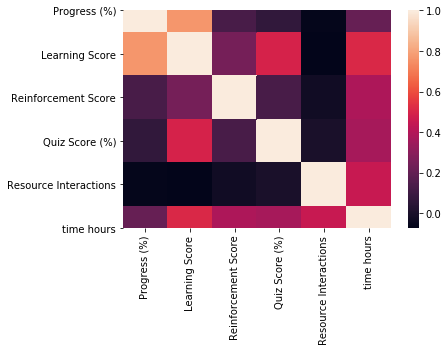

In [92]:
import seaborn as sns


sns.heatmap(good_df.corr())

plt.show()



In [104]:
n = 50
sorted_df = good_df.sort_values('Learning Score')
sorted_df['rank'] = 0
sorted_df['rank'][:n] = 1
sorted_df['rank'][len(sorted_df)-n:-1] = -1

top = sorted_df[:n]
bot = sorted_df[len(sorted_df)-n:-1]

/home/david/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/david/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [110]:
sorted_df.scatter()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [105]:
sorted_df

,Name,Teams,Progress (%),Learning Score,Reinforcement Score,Quiz Score (%),Time Spent,Resource Interactions,Last Activity Date,time hours,rank
2076,CLIC AZ,"AstraZeneca,Test Macron GA 1",4.0,0.4,0.0,50.0,00:02:41,11.0,2020-01-22,2.683333,1
2060,CLIC AstraZeneca,"AstraZeneca,Test Georgia",4.0,0.8,0.0,100.0,00:00:27,3.0,2020-01-21,0.450000,1
2058,Chris Quinn,AstraZeneca,8.0,0.8,0.4,50.0,00:31:02,58.0,2020-01-23,31.033333,1
1978,Donald Benson,Test Georgia,35.0,1.2,1.2,51.0,00:32:25,184.0,2020-01-24,32.416667,1
1972,Michele Spittal,Northeast Phila PA 1,60.0,1.6,0.0,48.0,00:40:22,109.0,2020-01-14,40.366667,1
...,...,...,...,...,...,...,...,...,...,...,...
4,Vanessa Gonzalez,Metro,98.0,8.7,0.7,96.0,04:43:22,259.0,2019-10-16,283.366667,-1
3,Gisela Donate,Metro Endocrinologists 1,98.0,9.0,7.0,73.0,12:03:36,304.0,2019-10-21,723.600000,-1
2,Deborah Crouse,Philadelphia PA,98.0,9.3,0.0,83.0,07:10:12,82.0,2019-10-16,430.200000,-1
1,Steve Hladek,San Antonio TX 1,98.0,9.3,3.0,79.0,07:32:28,229.0,2019-10-18,452.466667,-1


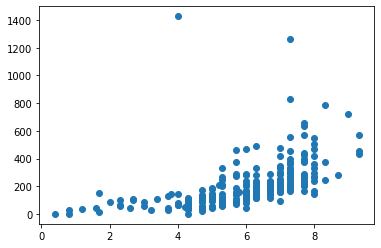

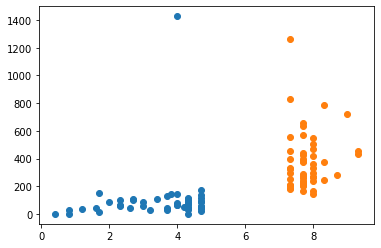

In [89]:
import matplotlib.pyplot as plt

plt.scatter(x=good_df['Learning Score'], y=good_df['time hours'])
plt.show()
plt.scatter(x=top['Learning Score'], y=top['time hours'])
plt.scatter(x=bot['Learning Score'], y=bot['time hours'])
plt.show()


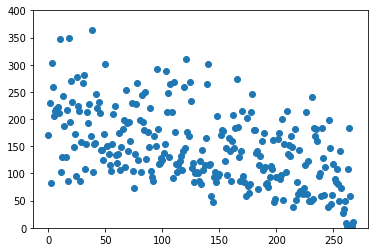

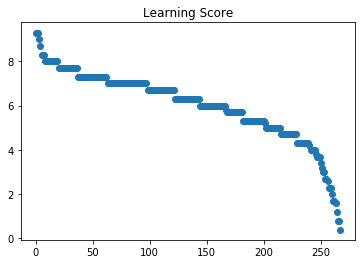

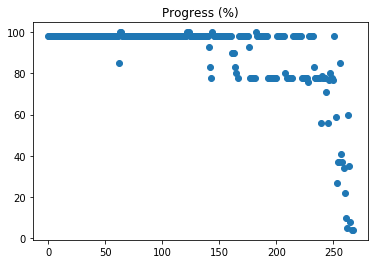

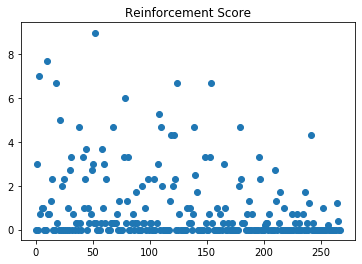

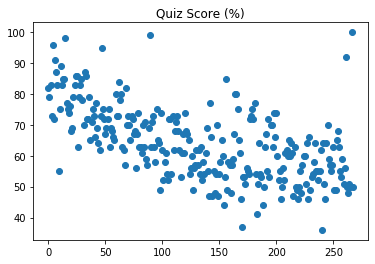

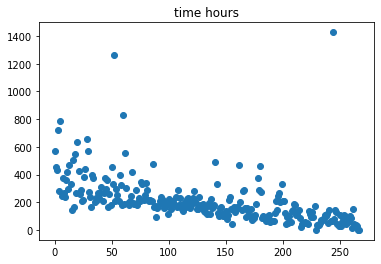

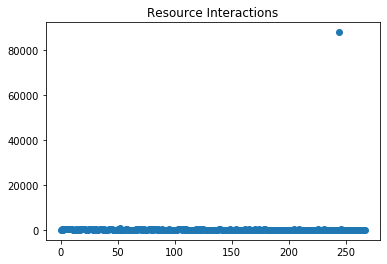

In [127]:
my_cols = [
    'Learning Score',
'Progress (%)',
'Reinforcement Score',
'Quiz Score (%)',
'time hours',
'Resource Interactions',
          ]
          
plt.scatter(x =range(len(good_df)), y = good_df['Resource Interactions'])
plt.ylim(0,400)
plt.show()      
          
for c in my_cols:
    plt.title(c)    
    plt.scatter(x =range(len(good_df)), y = good_df[c])
    plt.show()

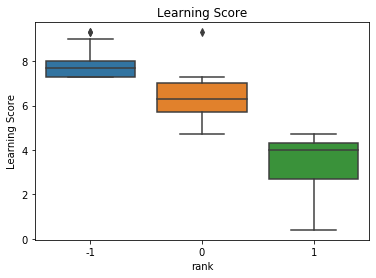

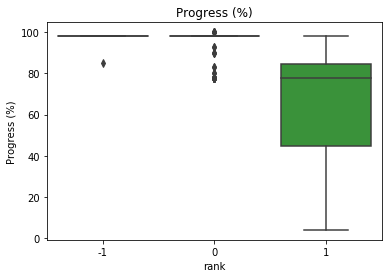

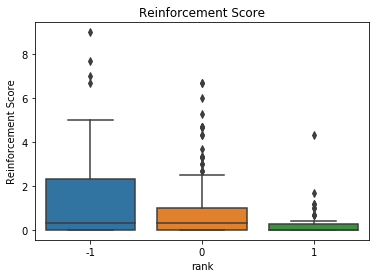

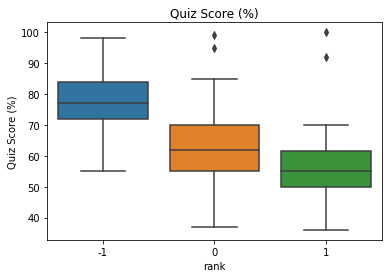

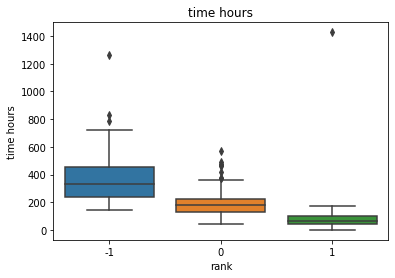

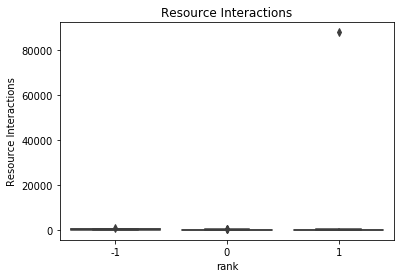

In [128]:
col = 'time hours'
col = 'Learning Score'


for c in my_cols:
    plt.title(c)
    sns.boxplot(x="rank", y=c, data=sorted_df)

    plt.show()

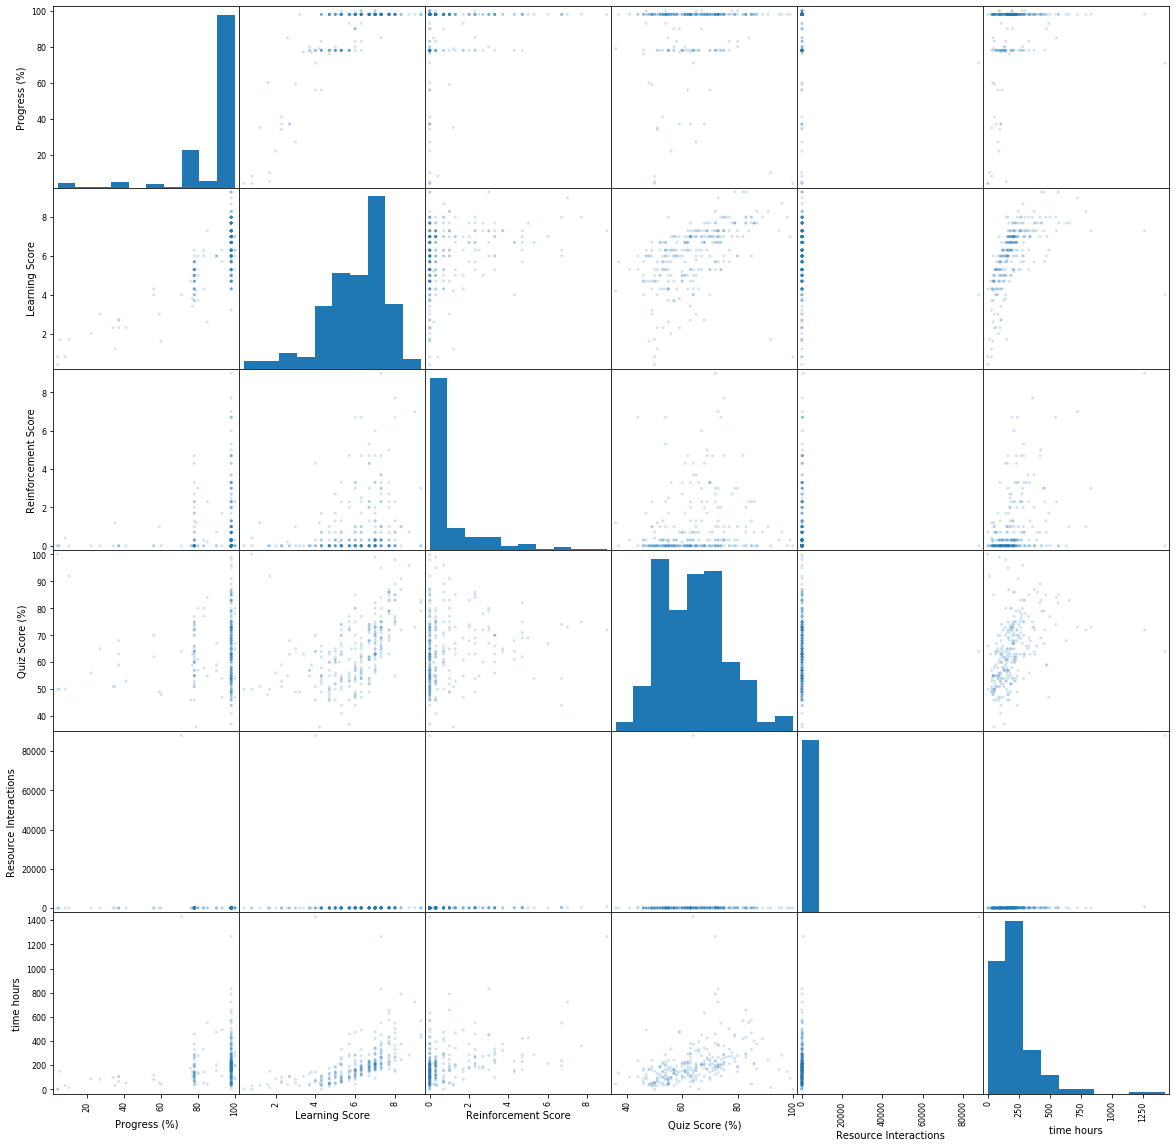

In [88]:
pd.plotting.scatter_matrix(good_df, alpha=0.2, figsize=(20, 20))
plt.show()

In [102]:
good_df.Teams.unique()

array(['Evanston IL 1', 'San Antonio TX 1', 'Philadelphia PA',
       'Metro Endocrinologists 1', 'Metro', 'Allentown PA 1',
       'South Florida', 'Memphis TN', 'Durham NC 1', 'Boston MA',
       'Cleveland OH 1', 'AstraZeneca', 'Jackson MS 2', 'New Haven CT 1',
       'Pittsburgh PA 1', 'Oklahoma City OK 1', 'Riverside CA 1',
       'Philadelphia N PA 1', 'San Juan', 'Knoxville TN 1',
       'Lancaster PA 2', 'Springfield IL 1', 'Bridgeport CT 1',
       'Shreveport LA 1', 'Jacksonville FL 1', 'Philadelphia S PA 1',
       'Toms River NJ 1', 'Dallas W TX 1', 'Macon GA 1',
       'Winston Salem NC 1', 'Buffalo NY 1', 'Santa Barbara CA 1',
       'Austin TX 1', 'Kansas City MO', 'Miami FL 1', 'Denver CO 1',
       'Indianapolis IN', 'Detroit MI', 'Orlando FL 1', 'Charleston WV 1',
       'Honolulu HI 1', 'New Hyde Park NY 1', 'Las Vegas NV 1',
       'Nashville TN 1', 'St Louis MO 1', 'Ann Arbor MI 1',
       'Berkley MI 1', 'Brooklyn S NY 1', 'Seattle WA 1', 'Jackson MS 1',
       'N